# Python and Numpy tutorial for Deep Learning

(by: [Ruben Nuredini](mailto:ruben.nuredini@hs-heilbronn.de), Heilbronn University, Germany, September 2018, rev. March 2023) 

## 0 - Jupyter Notebooks

* You are reading this line in a Jupyter Notebook.
* A notebook consists of cells. A cell can contain either rich text elements (paragraph, equations, figures, links, etc…) or code (like the next cell). 
* You can __run a cell__ with code by selecting it (click) and pressing `Ctrl + Enter` to execute the code and display output(if any).
* Jupyter notebooks are  If you're running this on a device with no keyboard, use topbar (esp. play/stop/restart buttons) to run code.
* Behind the curtains, there's a Python interpreter that runs that code and remembers anything you defined.
* Some helpful features include:
    * Top menu -> Kernel -> Interrupt (or Stop button) if you want it to stop running cell midway.
    * Top menu -> Kernel -> Restart (or cyclic arrow button) if interrupt doesn't fix the problem (you will lose all variables).
    * if you're typing something, press `Tab` to see automatic suggestions, use arrow keys + enter to pick one.
    * if you move your cursor inside some function and press `__Shift + Tab__`, you'll get a help window. `Shift + (Tab , Tab)` will expand it.
* For a summary of the Markdown elements that are supported by Jupyter Notebooks refer to [this](https://notebook.community/tschinz/iPython_Workspace/00_Admin/CheatSheet/Markdown%20CheatSheet) cheatsheet.
* For more information please refer to the official [documentation](https://jupyter-notebook.readthedocs.io/en/stable/).
    * the ["Beginners Guide"](https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html) or the ["Hacker's guide"](http://arogozhnikov.github.io/2016/09/10/jupyter-features.html) can be quite helpful.
* In this notebook i borrowed from [1]. 

Run these cells to get started

In [1]:
x = 7

In [2]:
print (x**2)

49


## 1 - NumPy

NumPy is the fundamental package for scientific computing with Python. It includes a powerful N-dimensional array object as well as linear algebra and random number capabilities that are useful for data science. NumPy also provides sophisticated (broadcasting) functions out-of-the box. NumPy is maintained by a large community (www.numpy.org). Any time you need more info on a numpy function, we encourage you to look at [the official documentation](https://docs.scipy.org/doc/numpy/).

As NumPy and is a library, it has to be included using the `import` keyword.

In [3]:
import numpy as np

### 1.1 - Basic data structures with NumPy

NumPy provides a very convenient way to create N-dimensional arrays. The data structures used in NumPy to represent these shapes (vectors, matrices...) are called numpy arrays.

### 1.1 - Manual creation of NumPy vectors and matrices

Let us create two one-dimensional arrays (vectors) each with 6 elements.

In [4]:
X = np.array([[5, 1, 4, 2, 6, 0]], dtype=np.double) # the dtype parameter can be used to define the type of the array elements.
Y = np.array([1., 2., 3., 4., 5., 6.]) # if the dtype parameter is omitted Python deduces the elements type.

In [5]:
print (X)
print (Y)

[[5. 1. 4. 2. 6. 0.]]
[1. 2. 3. 4. 5. 6.]


Let us check the type of X.

In [6]:
type(X)

numpy.ndarray

A very common NumPy function used in machine learning is [np.shape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html). It is used to get the shape (dimension) of the matrix/vector X and Y.

In [7]:
print (X.shape)
print (Y.shape)

(1, 6)
(6,)


**Important notice**:
- the type of a regular Python array is `list` whereas of a NumPy array is `numpy.ndarray`
- Make sure that you keep track of the dimensions of the data structures you create with NumPy.
- Many bugs in deep learning implementations are caused by improper shapes.
- A good practice is to define one-dimensional arrays in a full-fledged way (the way X was created).

Transposing data structures with [np.T](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.T.html) is another common function in NumPy used in deep learning. Pay attention on what happens when we try to transpose the vector Y.

In [8]:
X_transposed = X.T
Y_transposed = Y.T

In [9]:
print (X_transposed)
print (Y_transposed)

[[5.]
 [1.]
 [4.]
 [2.]
 [6.]
 [0.]]
[1. 2. 3. 4. 5. 6.]


In [10]:
X_transposed.shape

(6, 1)

Let us create a two-dimensional matrix of shape 6x6.

In [11]:
Z = np.array([[3, 0, 1, 2, 7, 4], 
              [1, 5, 8, 9, 3, 1], 
              [2, 7, 2, 5, 1, 3], 
              [0, 1, 3, 1, 7, 8], 
              [4, 2, 1, 6, 2, 8], 
              [2, 4, 5, 2, 3, 9]], np.double)
print (Z)

[[3. 0. 1. 2. 7. 4.]
 [1. 5. 8. 9. 3. 1.]
 [2. 7. 2. 5. 1. 3.]
 [0. 1. 3. 1. 7. 8.]
 [4. 2. 1. 6. 2. 8.]
 [2. 4. 5. 2. 3. 9.]]


In [12]:
print (Z.shape) # the first dimension of Z is now 6.
print (Z.shape[0]) # each dimension of a multidimensional array can be obtained separately.

(6, 6)
6


You can also create NumPy arrays in higher dimensions. Let us create a 3-D NumPy array.

In [13]:
highDimArray = np.array([
    [[0.00, 0.01, 0.02],
     [0.10, 0.11, 0.12],
     [0.20, 0.21, 0.22]],
    
    [[1.00, 1.01, 1.02], 
     [1.10, 1.11, 1.12],
     [1.20, 1.21, 1.22]],
    
    [[2.00, 2.01, 2.02], 
     [2.10, 2.11, 2.12],
     [2.20, 2.21, 2.22]]
])

In [14]:
highDimArray.shape

(3, 3, 3)

Accessing elements in a multidimensional array is by using its indices.

In [15]:
highDimArray[0] #using one index retrieves a 2-D NumPy array.

array([[0.  , 0.01, 0.02],
       [0.1 , 0.11, 0.12],
       [0.2 , 0.21, 0.22]])

In [16]:
highDimArray[1, 0] #using two indices retrieves a 1-D NumPy array.

array([1.  , 1.01, 1.02])

In [17]:
highDimArray[2, 2, 1] #three indices retrieve scalar value.

2.21

### 1.2 - Initialization of NumPy vectors and matrices

A very convenient functions for quick initialization of NumPy arrays are:
- [np.zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) that returns a new array of given shape and type, filled with zeros.
- [np.random.rand](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.rand.html) that creates an array of the given shape and populate it with random samples from a uniform distribution over $[0, 1)$

These functions are very useful when it comes to the initialization of the parameters (weights and biases) in a neural network:
- the weight matrices $(W^{[1]}, W^{[2]}, W^{[3]}, ..., W^{[L-1]}, W^{[L]})$ should be initialized randomly to break symmetry.
- the bias vectors $(b^{[1]}, b^{[2]}, b^{[3]}, ..., b^{[L-1]}, b^{[L]})$ are usually initialized to zeros.




#### 1.2.1 - Zero initialization
A typical usage of `np.zeros` is as follows

In [18]:
np.zeros((2, 5, 6))

array([[[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]]])

Let us say that the $L$-th layer in a neural network consists of 10 neurons. Each of them is associated with a bias. In order to initialize the `b_L` vector to zeros we could use:

In [19]:
layer_L_dims = 10
b_L = np.zeros((layer_L_dims, 1))
print (b_L)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


#### 1.2.2 - Random Initialization 

A typical usage of `np.random.rand` is as follows

In [20]:
np.random.rand(7, 4)

array([[0.79683645, 0.02970798, 0.24079917, 0.85261545],
       [0.43001716, 0.55015165, 0.60424108, 0.65956715],
       [0.95273858, 0.80947862, 0.74509748, 0.03140259],
       [0.4870847 , 0.99502398, 0.26184747, 0.62970768],
       [0.15977928, 0.14055376, 0.56987746, 0.4946188 ],
       [0.61640527, 0.80146988, 0.34315009, 0.60653233],
       [0.7784146 , 0.01866631, 0.73648306, 0.76043895]])

The usage of an equal seed makes sure your "random" numbers will be the same as ours. Running the code several times gives you always the same values.

In [21]:
np.random.seed(6) 
np.random.rand(4, 3)

array([[0.89286015, 0.33197981, 0.82122912],
       [0.04169663, 0.10765668, 0.59505206],
       [0.52981736, 0.41880743, 0.33540785],
       [0.62251943, 0.43814143, 0.73588211]])

#### 1.2.2.1 - (OPTIONAL) Random Initialization of Neural Network Weights

Let us say that we define the dimensions of a fully connected feed-forward neural network as a python array. Our sample network is as follows:

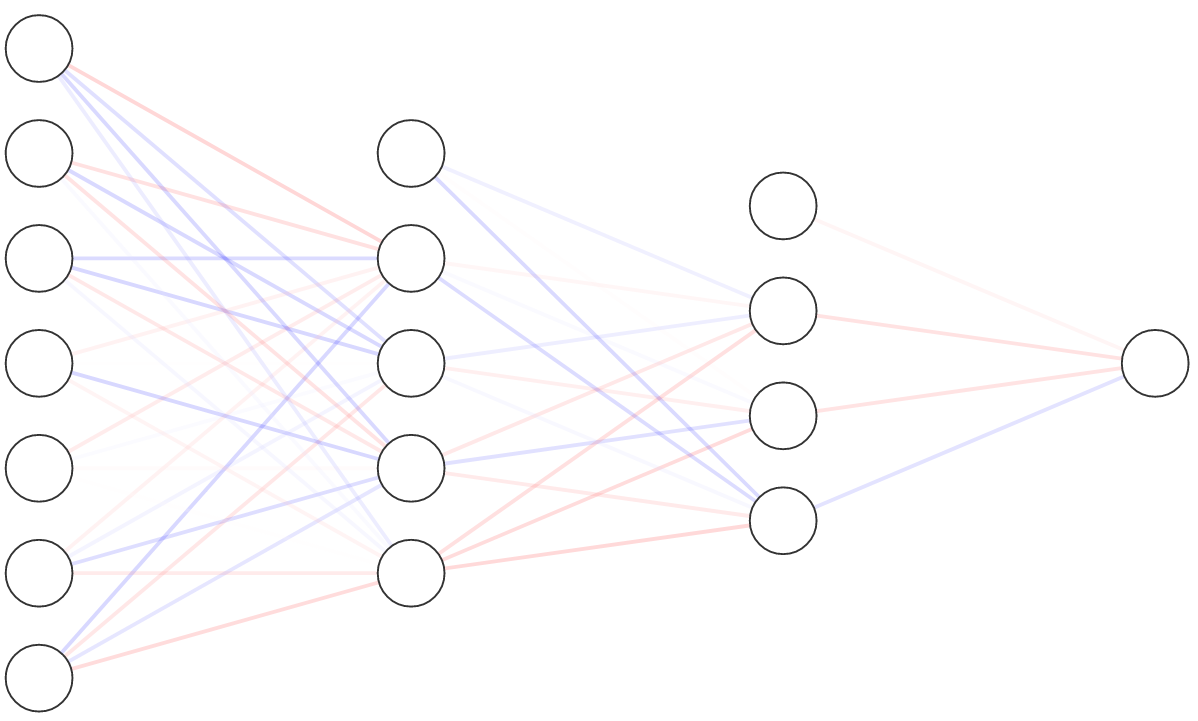

The network consists of:
- input layer with 6 neurons
- first hidden layer with 4 neurons
- second hidden layer with 3 neurons
- output layer of 1 neuron
- a bias unit for each of the layers (except the output layer)

In [22]:
# this defines a network structure consisting of 6-neuron input layer,
# 1-neuron outpit layer and 2 hidden layers each consisting of 4 and 3 neurons respectively.
layer_dims = [6, 4, 3, 1]

In this case there are 3 matrices of weights with the sizes:
- `W1.shape = (4, 6)`
- `W2.shape = (3, 4)`
- `W3.shape = (1, 3)`

The following function is used to initialize the weights to random values. 

In [23]:
def initialize_parameters_random(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    np.random.seed(3)               # For testing purposes - make sure that the results are the "expected"
    parameters = {}
    L = len(layer_dims)            # integer representing the number of layers
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) # YOUR CODE HERE
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1)) # YOUR CODE HERE

    return parameters

In [24]:
parameters = initialize_parameters_random([6,4,3,1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
print("W3 = " + str(parameters["W3"]))
print("b3 = " + str(parameters["b3"]))

W1 = [[ 1.78862847  0.43650985  0.09649747 -1.8634927  -0.2773882  -0.35475898]
 [-0.08274148 -0.62700068 -0.04381817 -0.47721803 -1.31386475  0.88462238]
 [ 0.88131804  1.70957306  0.05003364 -0.40467741 -0.54535995 -1.54647732]
 [ 0.98236743 -1.10106763 -1.18504653 -0.2056499   1.48614836  0.23671627]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-1.02378514 -0.7129932   0.62524497 -0.16051336]
 [-0.76883635 -0.23003072  0.74505627  1.97611078]
 [-1.24412333 -0.62641691 -0.80376609 -2.41908317]]
b2 = [[0.]
 [0.]
 [0.]]
W3 = [[-0.92379202 -1.02387576  1.12397796]]
b3 = [[0.]]


#### 1.2.3 - He and Xavier initialization

In real world applications it is usual to use He or Xavier initialization of the parameters in a neural network:

- "Xavier initialization" uses a scaling factor for the weights $W^{[l]}$ of `sqrt(1./layers_dims[l-1])`
- "He Initialization" uses a scaling factor for the weights $W^{[l]}$ of `sqrt(2./layers_dims[l-1])`[2]

**Task**: Implement the following function to initialize your parameters with He initialization. The only difference is that you will multiply the `np.random.randn(..,..)` by $\sqrt{\frac{2}{\text{dimension of the previous layer}}}$, which is what He initialization recommends for layers with a ReLU activation (dont worry, we will discuss the different activation functions in the following section).

In [25]:
def initialize_parameters_he(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) - 1 # integer representing the number of layers
     
    for l in range(1, L + 1):
        parameters['W' + str(l)] =  np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2./layer_dims[l-1])
        parameters['b' + str(l)] =  np.zeros((layer_dims[l], 1))
    return parameters

In [26]:
parameters = initialize_parameters_he(layer_dims)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
print("W3 = " + str(parameters["W3"]))
print("b3 = " + str(parameters["b3"]))

W1 = [[ 1.03266513  0.25201908  0.05571284 -1.07588801 -0.16015015 -0.20482019]
 [-0.04777082 -0.36199901 -0.02529843 -0.27552196 -0.75856017  0.51073697]
 [ 0.50882921  0.98702247  0.02888694 -0.23364061 -0.31486371 -0.89285909]
 [ 0.5671701  -0.63570169 -0.68418693 -0.11873202  0.85802815  0.1366682 ]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.72392541 -0.50416233  0.44211496 -0.11350009]
 [-0.5436494  -0.16265628  0.52683434  1.39732134]
 [-0.87972804 -0.44294365 -0.56834846 -1.71055012]]
b2 = [[0.]
 [0.]
 [0.]]
W3 = [[-0.75427303 -0.83599106  0.91772416]]
b3 = [[0.]]


**Expected Result:**

`W1 = [[ 1.03266513  0.25201908  0.05571284 -1.07588801 -0.16015015 -0.20482019]
 [-0.04777082 -0.36199901 -0.02529843 -0.27552196 -0.75856017  0.51073697]
 [ 0.50882921  0.98702247  0.02888694 -0.23364061 -0.31486371 -0.89285909]
 [ 0.5671701  -0.63570169 -0.68418693 -0.11873202  0.85802815  0.1366682 ]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.72392541 -0.50416233  0.44211496 -0.11350009]
 [-0.5436494  -0.16265628  0.52683434  1.39732134]
 [-0.87972804 -0.44294365 -0.56834846 -1.71055012]]
b2 = [[0.]
 [0.]
 [0.]]
W3 = [[-0.75427303 -0.83599106  0.91772416]]
b3 = [[0.]]`

## 2 - Linear Algebra fundamentals with NumPy

Linear algebra is the branch of mathematics concerning linear equations such as linear functions such as 
and their representations through matrices and vector spaces. Linear algebra is particularly useful in deep learning as it provides efficiency in terms of calculation speed and simplicity in coding. By employing linear algebra operations the amount of loops (`for`, `while` constructs) is decreased to minimum.

**Task**: Examine the following code snippet:

In [27]:
arr1 = [1, 2, 3, 4]
arr2 = [5, 6, 7, 8]

In [28]:
# Multiplication of two python arrays with a loop
product = []
for i in range(len(arr1)):
    product.append(arr1[i] * arr2[i])
product

[5, 12, 21, 32]

Multiplying two vectors seems to be very complicated when using `for` loop. Additionally, raw python is terrible at this because each operation is interpreted at runtime. 

Utilizing NumPy the same result can be achieved by: 

In [29]:
# Linear algebra version by employing NumPy
np.array(arr1) * np.array(arr2)

array([ 5, 12, 21, 32])

### 2.1 - NumPy and vectorized computing

In [30]:
a = np.array([1, 2, 3, 4, 5])
b = np.array([5, 4, 3, 2, 1])
print("a = ", a)
print("b = ", b)

# math and boolean operations can applied to each element of an array
print("a + 1 =", a + 1)
print("a * 2 =", a * 2)
print("a == 2", a == 2)

# ... or corresponding elements of two (or more) arrays
print("a + b =",a + b)
print("a * b =",a * b)

a =  [1 2 3 4 5]
b =  [5 4 3 2 1]
a + 1 = [2 3 4 5 6]
a * 2 = [ 2  4  6  8 10]
a == 2 [False  True False False False]
a + b = [6 6 6 6 6]
a * b = [5 8 9 8 5]


### 2.2 - Matrix Multiplication

Similarrly, multiplication of matrix to a scalar is done by multiplying each element of the matrix to the scalar,

In [31]:
A = np.random.randint(11, size=(3, 4)) # Generate a 3 x 4 matrix of ints between 0 (inclusive) and 11 (exclusive):
print ('The original values of the matrix: ')
print(A)
print ('The values of the matrix scaled by 2: ')
print (A * 2)

The original values of the matrix: 
[[0 2 2 7]
 [0 5 0 1]
 [4 1 2 2]]
The values of the matrix scaled by 2: 
[[ 0  4  4 14]
 [ 0 10  0  2]
 [ 8  2  4  4]]


Multiplying a matrix by a matrix is tricky as not every two matrices can be multiplied. If $A$ is an $n × m$ matrix and $B$ is an $m × p$ matrix, their matrix product $AB$ is an $n × p$ matrix. The $m$ entries across a row of $A$ are multiplied with the $m$ entries down a column of $B$ and summed to produce an entry of $AB$.

The NumPy function for multiplying matrices is [np.matmul](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html).

In [32]:
print (A)
print ('The shape of the matrix A is', A.shape)

[[0 2 2 7]
 [0 5 0 1]
 [4 1 2 2]]
The shape of the matrix A is (3, 4)


In [33]:
B = np.random.randint(11, size=(4, 5))
print (B)
print ('The shape of the matrix B is', B.shape)

[[ 4 10  8  0 10]
 [ 6  0  4  1  5]
 [ 1  8  8  7  0]
 [ 0  9  1  7  8]]
The shape of the matrix B is (4, 5)


In [34]:
AB = np.matmul(A, B)
print (AB)
print ('The shape of the matrix AB is', AB.shape)

[[14 79 31 65 66]
 [30  9 21 12 33]
 [24 74 54 29 61]]
The shape of the matrix AB is (3, 5)


The attempt to obtain the product BA will result with an error. Why? because B has 5 col and A has 4 row 

In [35]:
# BA = np.matmul(B, A) # should produce Error

### 2.3 - Dot Product

One very important vector operation in machine learning is the dot product. The dot product is the multiplication of two vectors and results with a scalar.



In [36]:
coeff = np.random.randn(4, 1)
coeff

array([[-0.13191423],
       [-0.45912326],
       [-0.01700419],
       [ 0.84601216]])

In [37]:
data_point = np.array([[1, 1, 2, 0]]).T
data_point

array([[1],
       [1],
       [2],
       [0]])

In [38]:
np.dot(coeff.T, data_point)

array([[-0.62504588]])

In machine learning the datasets are usually represented as groups of datapoints. The dot product is very helpful when each of the datapoints in the dataset should be multiplied by the weights vector $w$. 

In [39]:
# an imaginary dataset of 10 data points each represented as a 4 x 1 vector.
data_set = np.random.randint(3, size=(4, 10))
data_set

array([[0, 0, 2, 2, 1, 1, 2, 0, 1, 2],
       [2, 0, 2, 1, 2, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 2, 0],
       [0, 1, 2, 2, 0, 1, 0, 1, 2, 1]])

In [40]:
# the result is a 1 x 10 vector where the elements correspond to the product of each datapoint and the weights vector.
Z = np.dot(coeff.T, data_set)
Z

array([[-0.91824652,  0.84601216,  0.50994933,  0.9520684 , -1.05016075,
         0.71409793, -0.72295173,  0.3868889 ,  1.5261017 ,  0.58218369]])

### 2.4 - Elementwise operation

In machine learning there sometimes persists a need to perform elementwise algebraic operation. Elementwise operations are binary operation that takes two matrices of the same dimensions, and produces another matrix where each element $(i,j)$ is the operation of elements $(i,j)$ of the original two matrices. Some of the NumPy functions for element-wise operations are:
* [`np.multiply`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.multiply.html) for multiplying arguments element-wise. This operation is also known as the **Hadamard product**.
* [`np.divide`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.divide.html)  for dividing arguments element-wise.
* [`np.add`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.add.html) for adding arguments element-wise.
* [`np.subtract`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.subtract.html) for subtracting arguments element-wise.
* [`np.square`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.square.html) return the element-wise square of the input.

A simple example is applying a filter(mask) on a matrix. A filter is applied in order to zero-out some elements of the matrix.

In [41]:
my_matrix = np.random.rand(4, 5) # creating a random 4 x 5 matrix of floating point numbers
my_mask = np.random.randint(2, size=(my_matrix.shape)) # creating a random matrix of zeroes or ones

In [42]:
print(my_mask)

[[1 1 1 1 1]
 [0 1 0 1 1]
 [1 1 0 0 0]
 [1 0 1 0 0]]


In [43]:
masked_matrix = np.multiply(my_matrix, my_mask) # the element-wise (Hadamard) product zeroes-out the elements corresponding to the zero positions in the mask
print (masked_matrix)

[[0.72566962 0.7849367  0.97209836 0.85097142 0.54359433]
 [0.         0.48887324 0.         0.7876182  0.48509423]
 [0.45527936 0.21798577 0.         0.         0.        ]
 [0.64017662 0.         0.41412692 0.         0.        ]]


In order to square all elements of the matrix the `np.squared` can be used:

In [44]:
np.square(masked_matrix)

array([[0.5265964 , 0.61612563, 0.94497523, 0.72415235, 0.29549479],
       [0.        , 0.23899705, 0.        , 0.62034243, 0.23531641],
       [0.2072793 , 0.0475178 , 0.        , 0.        , 0.        ],
       [0.4098261 , 0.        , 0.17150111, 0.        , 0.        ]])

## 3 -  Matplotlib

[Matplotlib](https://matplotlib.org/) is a 2D plotting library for Python and NumPy. Matplotlib collection `matplotlib.pyplot`is a collection of command style functions.

Additionally the `matplotlib.pyplot` should be imported. The `%matplotlib` is a [magic function](http://ipython.readthedocs.io/en/stable/interactive/tutorial.html#magics-explained) in IPython (the engine Jupyter notebooks run on). '%matplotlib inline' sets the backend of matplotlib to the 'inline' backend. With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

A very simple demonstration of plot of type [`matplotlib.pyplot.plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).

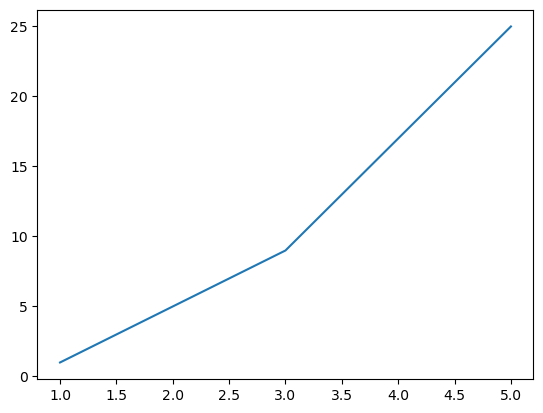

In [46]:
plt.plot([1., 3., 5.], [1., 9., 25.])
plt.show()

### 3.1 - Normalizing Dataset

Element-wise operations are useful for normalizing input data. Normalizing data is one of the techniques to speed-up the learning process when training an Artificial Neural Network. It consists of two steps:
* Subtract-out the mean $\mu$
* Normalize the variances $\sigma$

Let us create a dummy training set $X$ of 40 data points each with two input features $\begin{bmatrix} x_1\\x_2\end{bmatrix}$.

In [47]:
m = 40 # number of training examples

np.random.seed(4)
x1 = np.random.uniform(low=1.0, high=5.0, size=m) # values of feature x1 are between 1 and 5
x2 = np.random.uniform(low=2.0, high=3.0, size=m) # values of feature x2 are between 2 and 3

In [48]:
# # Uncomment if you want to add an "outlier"
# x1 = np.append(x1, [-4.0])
# x2 = np.append(x2, [-4.0])

In [49]:
X_original = np.array([x1, x2])
print(X_original)
print (X_original.shape)

[[4.86811936 3.188929   4.89073744 3.85926397 3.7909153  1.86435798
  4.90509782 1.02492102 2.01192945 2.73916613 4.11753169 1.7907403
  4.45197294 4.93360271 1.65536897 3.38933578 1.03594439 2.54628513
  1.17664023 4.82661187 2.74458659 4.79590923 4.14522394 4.46515719
  1.69266169 1.29979435 3.40297089 1.67188873 3.93352067 2.63377544
  3.11163529 4.75028634 3.08678449 1.43277353 1.63289363 3.18081061
  3.09761632 3.55044098 2.60598177 3.59922044]
 [2.3969     2.62391611 2.76740497 2.17897391 2.37557577 2.50253306
  2.68666708 2.25367965 2.55474086 2.62493084 2.89550117 2.36285359
  2.63755707 2.1914464  2.49779411 2.1824454  2.91838304 2.43182207
  2.8301881  2.4167763  2.90466759 2.40482522 2.3311745  2.57213877
  2.84544365 2.86101431 2.59568812 2.08466161 2.59726661 2.24545371
  2.73259345 2.89465129 2.51473397 2.60356351 2.06506781 2.54007473
  2.12918678 2.61456285 2.36365035 2.76775803]]
(2, 40)


Let us plot the data of X as a [`matplotlib.pyplot.scatter`](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.scatter.html) plot.

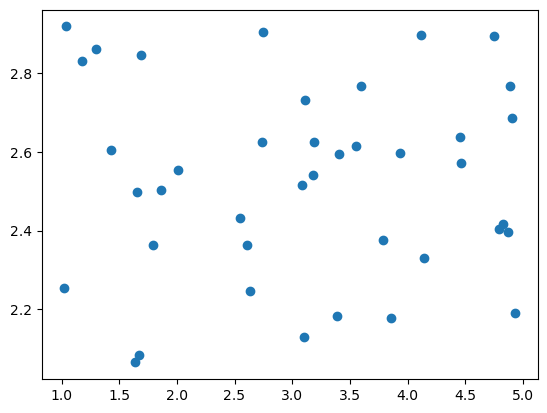

In [50]:
plt.scatter(x1, x2)
plt.show()


However, we sometimes want to save some time and wrap up plotting in a function.

In [51]:
# A helper function for plotting the dataset as a scatter plot
def plotting_helper(X, scale):
    plt.ylim((-scale, scale)) # setting the range of the plotted y-axis
    plt.xlim((-scale, scale)) # setting the range of the plotted x-axis
    plt.axhline(0, color='gray', linewidth=1, linestyle='dotted') # plot the x-axis
    plt.axvline(0, color='gray', linewidth=1, linestyle='dotted') # plot the y-axis
    plt.xlabel("feature x1")
    plt.ylabel("feature x2")
    return plt.scatter(X[0], X[1])

#### 3.1.1 - Graphical representation of the data in X

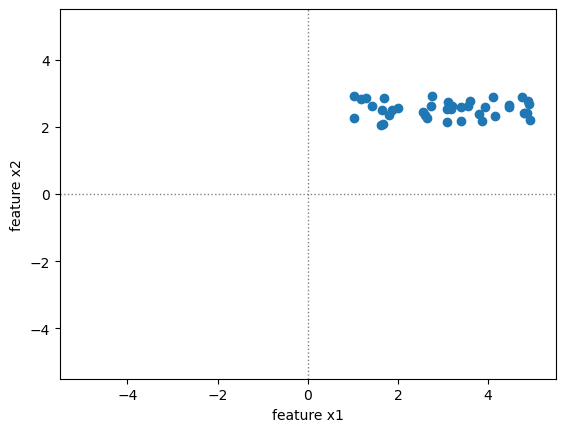

In [52]:
plotting_helper(X_original, 5.5)
plt.show()

The mean can be calculated as: $\mu = \frac{1}{m} {\sum_{i=1}^{m}x^{(i)}}$
and then subtracted out of each element of the corresponding feature:
$x := x - \mu$

In [53]:
mu_x1 = np.sum(X_original[0]) / m # calculate the mean of the x1 feature
mu_x2 = np.sum(X_original[1]) / m # calculate the mean of the x2 feature



########################## Sanity check #########################
np.testing.assert_allclose(mu_x1, np.mean(x1), rtol=1e-5, atol=0)
np.testing.assert_allclose(mu_x2, np.mean(x2), rtol=1e-5, atol=0)

# ∣actual−expected∣≤(atol+rtol×∣expected∣)
# Where:
#     rtol (relative tolerance) allows small percentage differences.
#     atol (absolute tolerance) allows a small fixed difference.
##################################################################

In [54]:
x1_new = X_original[0] - mu_x1
x2_new = X_original[1] - mu_x2
X_new = np.array([x1_new, x2_new])

#### 3.1.2 - Graphical representation of the data in X after subtracting the mean

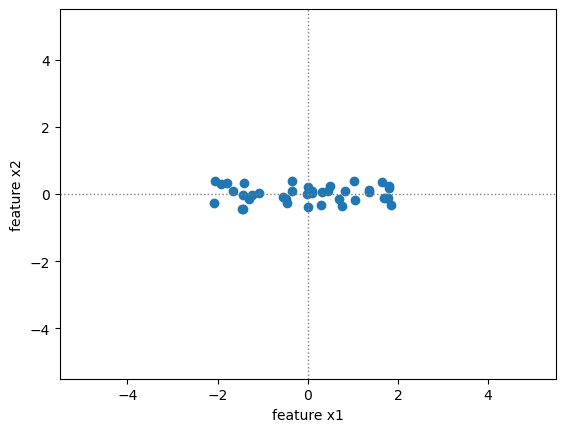

In [55]:
plotting_helper(X_new, 5.5)
plt.show()

Our training set has now (almost) zero-mean over both features.

In [56]:
print(X_new.mean(axis=1))

[1.33226763e-16 3.33066907e-17]


The next step is to normalize the variances. It is obvious that the feature $x_1$ has much larger variance than the feature $x_2$. In order to do so:

The variance can be calculated as: $\sigma^{2} = \frac{1}{m} {\sum_{i=1}^{m}x^{2}}$
and then each element of the features should be divided by the corresponding variance :
$x := \frac{x}{\sigma}$

In [57]:
sigma_x1 = np.sum(np.square(X_new[0])) / m # calculate the variance of the x1 feature
sigma_x2 = np.sum(np.square(X_new[1])) / m # calculate the variance of the x2 feature

############################## Sanity check #############################
np.testing.assert_allclose(sigma_x1, np.var(X_new[0]), rtol=1e-5, atol=0)
np.testing.assert_allclose(sigma_x2, np.var(X_new[1]), rtol=1e-5, atol=0)
#########################################################################

We now have the sigmas. Let us divide the features with their respective sigmas.

In [58]:
x1_norm = X_new[0] / np.sqrt(sigma_x1)
x2_norm = X_new[1] / np.sqrt(sigma_x2)
X_norm = np.array([x1_norm, x2_norm])

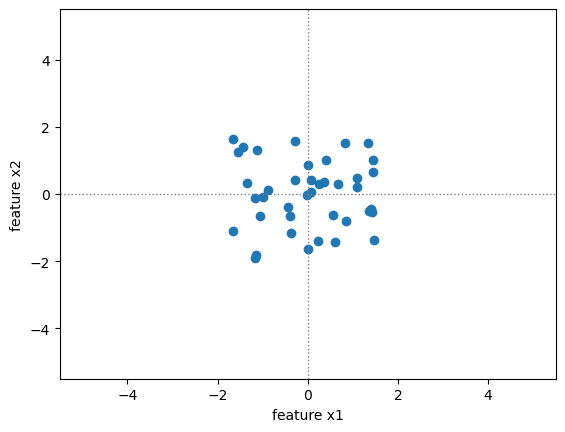

In [59]:
plotting_helper(X_norm, 5.5)
plt.show()

The variances of both $x_1$ and $x_2$ are now equal to 1.

In [60]:
print(X_norm.std(axis=1))

[1. 1.]


#### 3.1.3 - Calculating the norm: the elegant way

Another way to calculate the norm is by employing element-wise operations. It is a more elegant way.

In [61]:
sum_X = np.sum(np.square(X_new), axis=1) # element-wise squaring of all elements of the dataset and summing thep s per row
sigmas_X = np.divide(sum_X , m) # dividing the sums by m
sigmas_X = np.expand_dims(sigmas_X, axis=1) # reshaping the result with aditional axis - from (2,) to  (2, 1)

**Task:** Finish the normalization.

**Hint:** use `np.divide` and `np.sqrt`

In [62]:
# perform the element-wise division
X_norm_elegant = np.divide(X_new,np.sqrt(sigmas_X))
# print(X_norm_elegant)

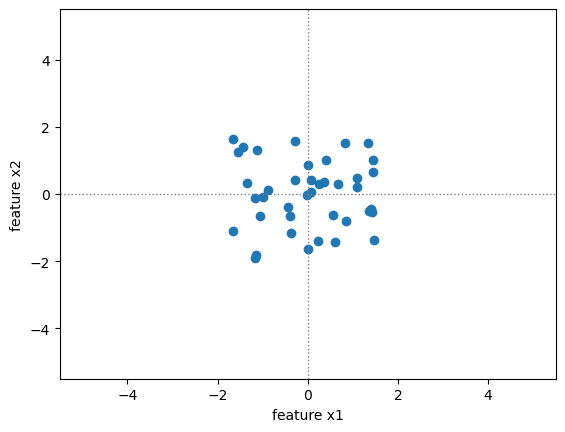

In [63]:
plotting_helper(X_norm_elegant, 5.5)
plt.show()

The variances of both $x_1$ and $x_2$ should again equal to 1.

In [64]:
print(X_norm_elegant.std(axis=1))

[1. 1.]


#### 3.1.4 - Out-of-the-box normalization with Scikit-Learn

Machine learning tools such as `sklearn` provide normalizing functions that let you apply various normalizations.

In [65]:
# Install Scikit-Learn
!pip install scikit-learn

In [66]:
from sklearn.preprocessing import scale

In [67]:
X_normed_sklearn = scale(X_original, axis=1)
plotting_helper(X_normed_sklearn, 5.5)
print(X_normed_sklearn.std(axis=1)) # the sum of the normalized features should be 1.

[1. 1.]


**Important notice**:
- keep track of the dimensions of the data structures in NumPy when calculating matrix and dot product. 
- in order to perform elementwise operations, the sizes of the NumPy arrays must be identical.

## 4 - Advanced Plotting with Matplotlib

### 4.1 - Plotting images

In machine learning problems, images are represented using standard NumPy arrays. This allows maximum inter-operability with other libraries in the scientific Python ecosystem.

The [matplotlib.pyplot.imshow](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html) is used to plot images.

In [68]:
im_width = 64 # defining the value for image width
im_height = 64 # defining the value for image height
im_channels = 3 # defining the number of channels. 3 stands for Red, Green, and Blue

# Creating a numpy array of random values(max value 256) with the shape (im_width, im_height, im_channels)
noise_image_rgb = np.random.randint(256, size=(im_width, im_height, im_channels))

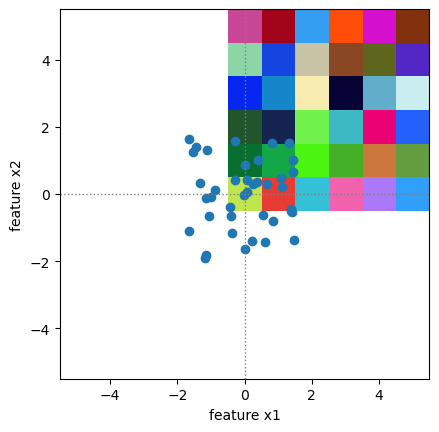

In [69]:
# use imshow to display a 3D NumPy array as an image. The third dimension is for the RGB channels
plt.imshow(noise_image_rgb)
plt.show()

Another way to represent images in machine learning is by one-dimensional array. 

In [70]:
# create a NumPy array of 64 * 64 = 4096 random numbers with values between 0 and 1
noise_image_bw = np.random.uniform(low=0.0, high=1.0, size=im_width * im_height)
print(noise_image_bw.shape)

(4096,)


In order to be plotted, the array should be reshaped using [np.reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html).

In [71]:
noise_image_bw = noise_image_bw.reshape(im_width, im_width)
print(noise_image_bw.shape)

(64, 64)


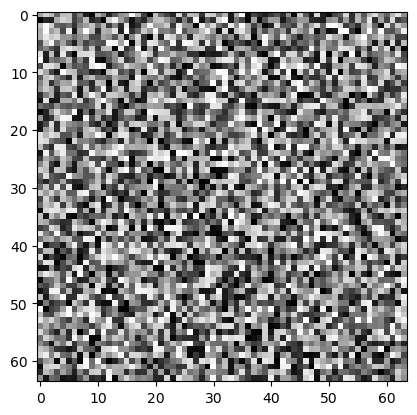

In [72]:
# The cmap parameter defines the color map. In this case we have a 2D array and therefore plot the grayscale image.
plt.imshow(noise_image_bw, cmap='gray') 
plt.show()

### 4.2 - Defining and Plotting Functions

#### 4.2.1 - Heavside Step Function
[np.heaviside](https://numpy.org/doc/stable/reference/generated/numpy.heaviside.html)

In [73]:
A = np.linspace(-5., 5., 100) # defining an array of 100 equally spaced real values between -5 and 5

In [74]:
def step(x):
    return np.heaviside(x, 0)

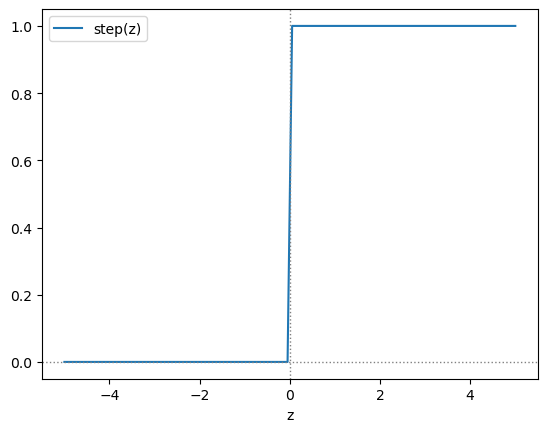

In [75]:
plt.plot(A, step(A), label="step(z)")
plt.axhline(0, color='gray', linewidth=1, linestyle='dotted') # plot the x-axis
plt.axvline(0, color='gray', linewidth=1, linestyle='dotted') # plot the y-axis
plt.xlabel("z")
plt.legend()
plt.show()

#### 4.2.2 - Sigmoid Function

The Sigmoid function: $$sigmoid(x) = \frac{1}{1+e^{-x}}$$ is sometimes also known as the logistic function. It is a non-linear function used not only in Machine Learning (Logistic Regression), but also in Deep Learning. The output of the sigmoid funcion ranges between 0 and 1.

**Task**: Implement the sigmoid function using numpy.

**Hint**: Use the [np.exp](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html) function.

In [76]:
def sigmoid(x):
    """
    Compute sigmoid of x.

    Arguments:
    x -- A scalar

    Return:
    s -- sigmoid(x)
    """
    s =  np.divide(1,1+np.exp(-x) )
    
    return s

In [77]:
x = np.array([1, 2, 3])
sigmoid(x)

array([0.73105858, 0.88079708, 0.95257413])

**Expected Result:** 

`array([0.73105858, 0.88079708, 0.95257413])`

**Important notice**: the argument x could be either a real number, a vector, or a matrix. 
$$ \text{For } x \in \mathbb{R}^n \text{,     } sigmoid(x) = sigmoid\begin{pmatrix}
    x_1  \\
    x_2  \\
    ...  \\
    x_n  \\
\end{pmatrix} = \begin{pmatrix}
    \frac{1}{1+e^{-x_1}}  \\
    \frac{1}{1+e^{-x_2}}  \\
    ...  \\
    \frac{1}{1+e^{-x_n}}  \\
\end{pmatrix}\tag{1} $$

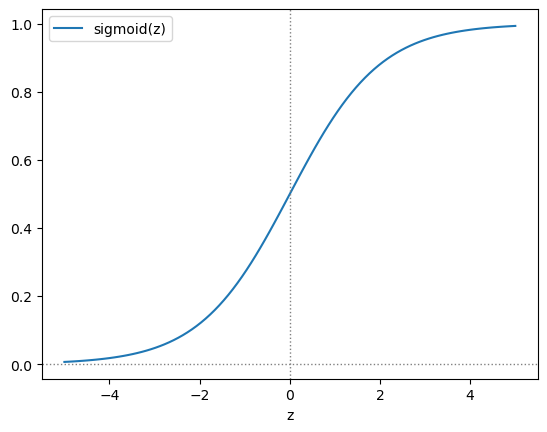

In [78]:
plt.plot(A, sigmoid(A), label="sigmoid(z)")
plt.axhline(0, color='gray', linewidth=1, linestyle='dotted') # plot the x-axis
plt.axvline(0, color='gray', linewidth=1, linestyle='dotted') # plot the y-axis
plt.xlabel("z")
plt.legend()
plt.show()

#### 4.2.3  - Tanh Function - the hyperbolic tangent function

The Hyperbolic tangent function $$tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}} = \frac{e^{2x} - 1}{e^{2x} + 1}$$ also known as the Tanh function is a non-linear function. This function is aslo used not only in Machine Learning and Deep Learning. The output of the tanh funcion ranges between -1 and 1.

**Task**: Implement the tanh function using numpy.

**Hint**: Use the [np.exp](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html) function.

In [79]:
def tanh(x):
    """
    Compute hyperbolic tangent of x.

    Arguments:
    x -- A scalar

    Return:
    tanh -- tanh(x)
    """
    tanh =  np.divide(np.exp(np.multiply(2,x))-1,np.exp(np.multiply(2,x))+1)
    
    return tanh

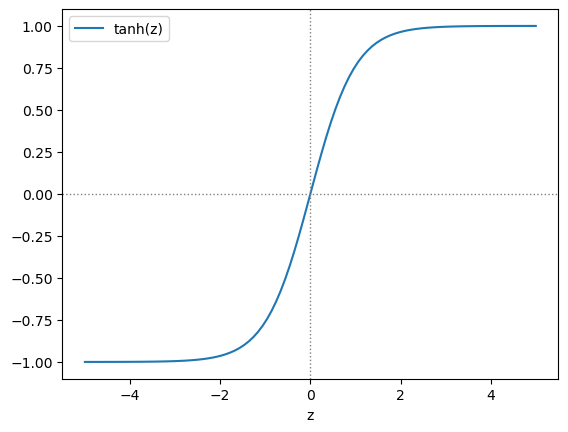

In [80]:
plt.plot(A, tanh(A), label="tanh(z)")
plt.axhline(0, color='gray', linewidth=1, linestyle='dotted') # plot the x-axis
plt.axvline(0, color='gray', linewidth=1, linestyle='dotted') # plot the y-axis
plt.xlabel("z")
plt.legend()
plt.show()

#### 4.2.4 - Rectified Linear Unit

The Rectified Linear Unit $$relu(x) = max(0, x)$$ also known as the ReLU is the most widely used activation function in deep learning. Its properties greately accelerate the convergence in the training process of deep neural networks.

**Task**: Implement the ReLU function using numpy.

**Hint**: Use the [np.maximum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.maximum.html) function.

In [81]:
def ReLU(x):
    """
    Compute ReLU of x.

    Arguments:
    x -- A scalar

    Return:
    relu -- ReLU(x)
    """
    relu =   np.maximum(0,x)
    
    return relu

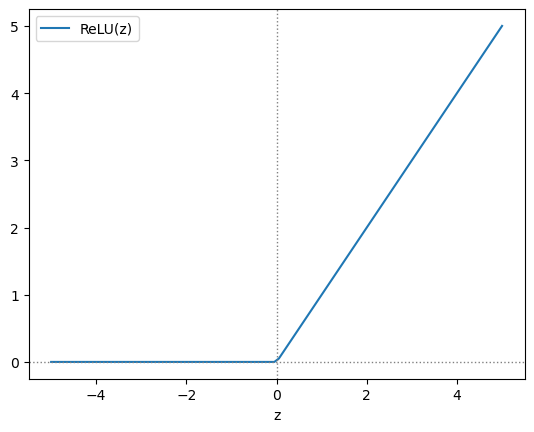

In [82]:
plt.plot(A, ReLU(A), label="ReLU(z)")
plt.axhline(0, color='gray', linewidth=1, linestyle='dotted') # plot the x-axis
plt.axvline(0, color='gray', linewidth=1, linestyle='dotted') # plot the y-axis
plt.xlabel("z")
plt.legend()
plt.show()

#### 4.2.5 - Leaky ReLU

**Task**: Take time and search for the equation of the Leaky ReLU function. Then, implement the Leaky ReLU function using numpy.

**Hint**: Use the [np.maximum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.maximum.html) function.

In [83]:
def LeakyReLU(x, a=0.01):
    """
    Compute leaky ReLU of x.

    Arguments:
    x -- A scalar
    a -- the leakage parameter default to 0.01

    Return:
    leaky_relu -- leakyReLU(x)
    say max(0.01 * -5,-5):-0.05
    """
    leaky_relu = np.maximum(a*x,x)
    
    return leaky_relu

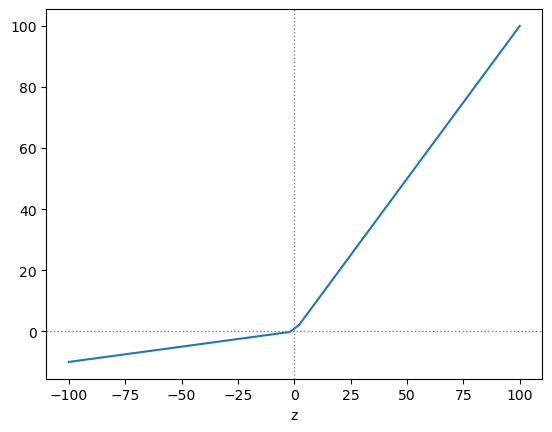

In [84]:
A3=np.linspace(-100,100)
plt.plot(A3, LeakyReLU(A3, 0.1), label="LeakyReLU(z)")
plt.axhline(0, color='gray', linewidth=1, linestyle='dotted') # plot the x-axis
plt.axvline(0, color='gray', linewidth=1, linestyle='dotted') # plot the y-axis
plt.xlabel("z")
plt.legend
plt.show()

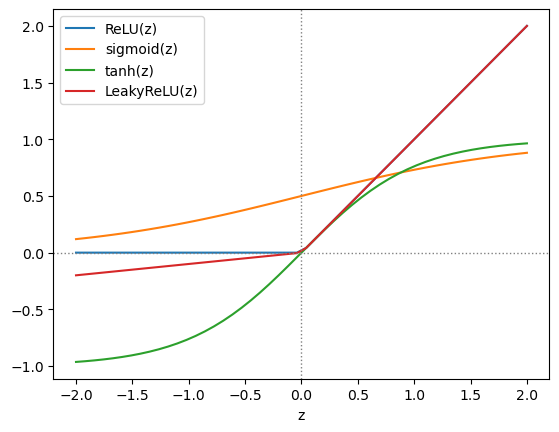

In [85]:
A2=np.linspace(-2, 2)
plt.plot(A2, ReLU(A2), label="ReLU(z)")
plt.plot(A2, sigmoid(A2), label="sigmoid(z)")
plt.plot(A2, tanh(A2), label="tanh(z)")
plt.plot(A2, LeakyReLU(A2, 0.1), label="LeakyReLU(z)")
plt.axhline(0, color='gray', linewidth=1, linestyle='dotted') # plot the x-axis
plt.axvline(0, color='gray', linewidth=1, linestyle='dotted') # plot the y-axis
plt.xlabel("z")
plt.legend()
plt.show()

In [86]:
np.random.randn(100)

array([ 0.53701766,  0.25879144,  0.55639378, -0.52762083,  0.92451267,
       -0.20955245, -2.2244058 ,  0.97120452, -0.42402695, -1.19987825,
        1.9041594 ,  1.78843704,  0.03502984,  1.35019644, -0.68196222,
        2.17592353,  2.36074022, -0.85099308, -0.55350534, -0.62507575,
        0.94088122,  0.58875264,  1.06598902,  2.36100772, -0.23875729,
       -1.7130467 ,  1.54409005,  0.17455316, -0.13010664,  0.30670826,
       -0.69791107,  1.4076243 ,  2.166487  ,  0.67247488,  1.57839866,
        1.37123244, -1.34470018,  1.38144043,  0.46854911, -1.74123156,
       -1.0561291 ,  0.6244443 ,  1.1189118 ,  1.87626092,  0.5510892 ,
        1.4002964 , -0.33606476,  1.34524527,  0.57779684, -0.14195605,
        1.10593743, -2.08005214,  1.96512354, -0.08685258,  0.85719829,
        0.11469109, -0.65259913,  0.55192823, -1.68912889, -1.21359275,
        0.99040862, -0.65553105,  1.02197926,  0.21784311,  1.77698742,
        0.24880973,  1.94102034,  1.17314054,  0.94632514,  1.21

### 4.3 - Broadcasting
A very important concept to understand in numpy is "broadcasting". It is very useful for performing mathematical operations between arrays of different shapes. For the full details on broadcasting, you can read the official [broadcasting documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

#### 4.3.1 - The Softmax Function
**Task**: Implement a softmax function using numpy. You can think of softmax as a normalizing function used when your algorithm needs to classify two or more classes.

**Instructions**:
- $ \text{for } x \in \mathbb{R}^{1\times n} \text{,     } softmax(x) = softmax(\begin{bmatrix}
    x_1  &&
    x_2 &&
    ...  &&
    x_n  
\end{bmatrix}) = \begin{bmatrix}
     \frac{e^{x_1}}{\sum_{j}e^{x_j}}  &&
    \frac{e^{x_2}}{\sum_{j}e^{x_j}}  &&
    ...  &&
    \frac{e^{x_n}}{\sum_{j}e^{x_j}} 
\end{bmatrix} $ 

- $\text{for a matrix } x \in \mathbb{R}^{m \times n} \text{,  $x_{ij}$ maps to the element in the $i^{th}$ row and $j^{th}$ column of $x$, thus we have: }$  $$softmax(x) = softmax\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\
    x_{21} & x_{22} & x_{23} & \dots  & x_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{m1} & x_{m2} & x_{m3} & \dots  & x_{mn}
\end{bmatrix} = \begin{bmatrix}
    \frac{e^{x_{11}}}{\sum_{j}e^{x_{1j}}} & \frac{e^{x_{12}}}{\sum_{j}e^{x_{1j}}} & \frac{e^{x_{13}}}{\sum_{j}e^{x_{1j}}} & \dots  & \frac{e^{x_{1n}}}{\sum_{j}e^{x_{1j}}} \\
    \frac{e^{x_{21}}}{\sum_{j}e^{x_{2j}}} & \frac{e^{x_{22}}}{\sum_{j}e^{x_{2j}}} & \frac{e^{x_{23}}}{\sum_{j}e^{x_{2j}}} & \dots  & \frac{e^{x_{2n}}}{\sum_{j}e^{x_{2j}}} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    \frac{e^{x_{m1}}}{\sum_{j}e^{x_{mj}}} & \frac{e^{x_{m2}}}{\sum_{j}e^{x_{mj}}} & \frac{e^{x_{m3}}}{\sum_{j}e^{x_{mj}}} & \dots  & \frac{e^{x_{mn}}}{\sum_{j}e^{x_{mj}}}
\end{bmatrix} = \begin{pmatrix}
    softmax\text{(first row of x)}  \\
    softmax\text{(second row of x)} \\
    ...  \\
    softmax\text{(last row of x)} \\
\end{pmatrix} $$

In [87]:
def softmax(x):
    """Calculates the softmax for each row of the input x.

    The code should work for a row vector and also for matrices of shape (n, m).

    Argument:
    x -- A numpy matrix of shape (n,m)

    Returns:
    s -- A numpy matrix equal to the softmax of x, of shape (n,m)
    """
    
    # Apply exp() element-wise to x. Use np.exp(...).
    x_exp = np.exp(x)

    # Create a vector x_sum that sums each row of x_exp. Use np.sum(..., axis = 1, keepdims = True).
    x_sum = np.sum(x_exp, axis = 1, keepdims = True)
    
    # Compute softmax(x) by dividing x_exp by x_sum. It should automatically use numpy broadcasting.
    s = x_exp / x_sum
    # s= np.divide(x_exp,x_sum)
    return s

In [88]:
x = np.array([
    [9, 2, 5, 0, 0],
    [7, 5, 0, 0 ,0]])
print("softmax(x) = " + str(softmax(x)))

softmax(x) = [[9.80897665e-01 8.94462891e-04 1.79657674e-02 1.21052389e-04
  1.21052389e-04]
 [8.78679856e-01 1.18916387e-01 8.01252314e-04 8.01252314e-04
  8.01252314e-04]]


**Expected Result:**

`softmax(x) = [[9.80897665e-01 8.94462891e-04 1.79657674e-02 1.21052389e-04
  1.21052389e-04]
 [8.78679856e-01 1.18916387e-01 8.01252314e-04 8.01252314e-04
  8.01252314e-04]]`

#### 4.3.2 Broadcasting and logical operations

In many machine learning applications, the output of a binary classifier is a vector of probabilities.

In [89]:
probabilities = np.random.rand(10, 1)
print (probabilities)

[[0.68391213]
 [0.290142  ]
 [0.33379528]
 [0.55056622]
 [0.59213561]
 [0.13118966]
 [0.21008233]
 [0.77729657]
 [0.0207883 ]
 [0.39409705]]


Each entry in the vector corresponds to the probability that the data sample belongs to the class A. A usual way to convert the probabilities to classes is to use threshold of 0.5 such as:
* if the probability is greater than 0.5 the data point belongs to class A
* otherwise it belongs to the class B

In [90]:
probabilities > 0.5

array([[ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False]])

## 5 - Demonstrating the speed advantage of NumPy

In this section we will demonstrate the speed advantage that NumPy has over standard Python code. For this purpose we calculate the time needed for creating two vectors each of 3.000.000 elements and summing them up in an elementwise manner:
* using pure Python code with `for` loop
* employing the `np.add` function on NumPy arrays

In [91]:
size_of_vec = 3000000 # the number of elements for X and Y

In [92]:
import time

def pure_python_version():
    t1 = time.time() # taking a snapshot of the current system time
    X = range(size_of_vec) # creating the  vector X
    Y = range(size_of_vec) # creating the vector Y
    Z = [] # creating a variable for aggregating the results
    
    # explicitly looping over the elements
    for i in range(len(X)):
        #appending the intermediate results to the aggregator array
        Z.append(X[i] + Y[i])
    # return the difference between current time and the snapshot taken earlier
    return time.time() - t1

def numpy_version():
    t1 = time.time() # taking a snapshot of the current system time
    X = np.arange(size_of_vec) # creaing the array X with np.arange
    Y = np.arange(size_of_vec) # creaing the array Y with np.arange
    Z = np.add(X, Y) # calculating the elementwise sum with np.add
    # return the difference between current time and the snapshot taken earlier
    return time.time() - t1

In [93]:
t1 = pure_python_version()

In [94]:
t2 = numpy_version()

In [95]:
print(t1, t2)
print("Numpy is " + str(t1/t2) + " times faster in this example!")

1.0799949169158936 0.013036012649536133
Numpy is 82.84702891526602 times faster in this example!


## References
[1] Coursera Online Course ["Neural Networks and Deep Learning"](https://www.coursera.org/learn/neural-networks-deep-learning/) by Andrew Ng


[2] K. He, X. Zhang, S. Ren and J. Sun, "Deep Residual Learning for Image Recognition," 2016 IEEE Conference on Computer Vision and Pattern Recognition (CVPR), Las Vegas, NV, 2016, pp. 770-778.